In [1]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')
!cd "/content/drive/My Drive/hack/"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

test_data =pd.read_excel('/content/drive/My Drive/hack/Test_dataset.xlsx')
train_data = pd.read_excel('/content/drive/My Drive/hack/Train_dataset.xlsx')
#Stock Index	Index	Industry	VWAP	General Index	NAV	P/E Ratio	Volumes Traded	Inventory Turnover	Covid Impact (Beta)	Tracking Error	Dollar Exchange Rate	Put-Call Ratio	P/B Ratio	Stock Price
traget = 'Stock Price'
colm =['Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']
y=train_data['Stock Price']
train = train_data[colm]
test = test_data[colm]
test_indx = test_data['Stock Index']
#train = train.drop(train.columns[0],axis=1)
#test_data = test_data.drop(test_data.columns[0],axis=1)

train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)
print(train_data.columns)
print(train.head())
print(test.head())
print(y.head())

# scatter plot of features  vs index /categories(for histograms of categorical data)  
# for categorical data 
cats=['Index', 'Industry']
uncats= ['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio'] 








Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')
     Index          Industry  ...  Put-Call Ratio  P/B Ratio
0     NYSE       Real Estate  ...            0.61       9.20
1     NYSE  Information Tech  ...         -999.00       6.91
2     NYSE  Information Tech  ...         -999.00       6.09
3      BSE         Materials  ...            1.11       5.60
4  S&P 500       Real Estate  ...            1.07       9.46

[5 rows x 13 columns]
     Index          Industry  ...  Put-Call Ratio  P/B Ratio
0      NSE         Materials  ...            0.80       4.66
1      JSE            Energy  ...            0.86       6.11
2  S&P 500  Information Tech  ...            0.93       4.99
3      NSE        Healthcare  ...            1.09       1.26
4     NYSE         Mate

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


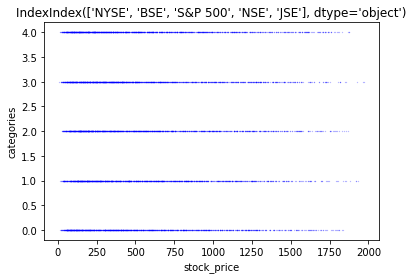

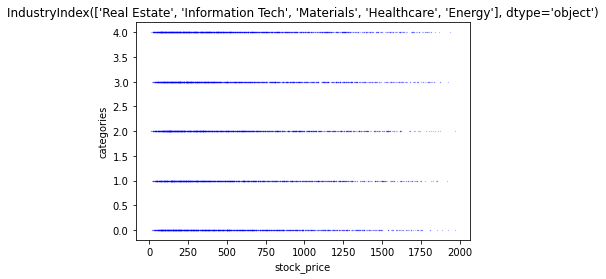

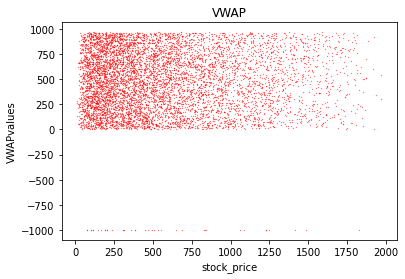

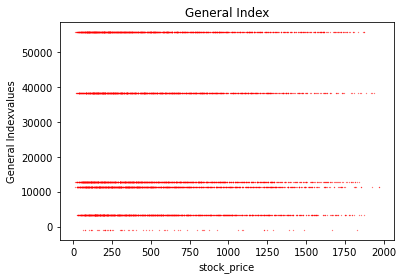

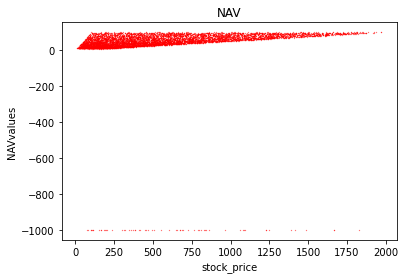

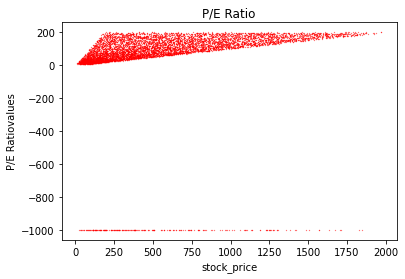

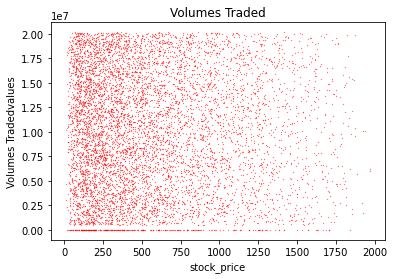

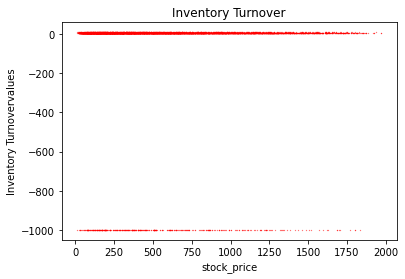

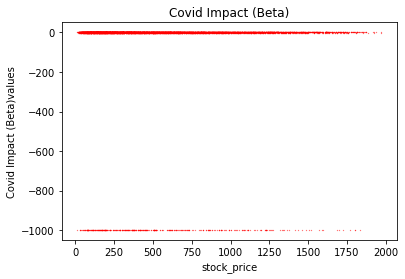

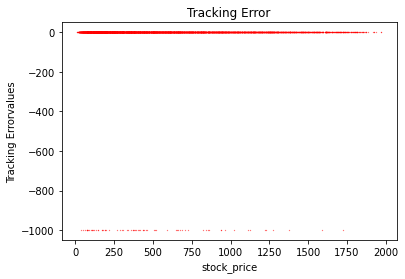

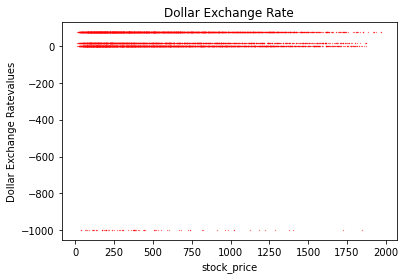

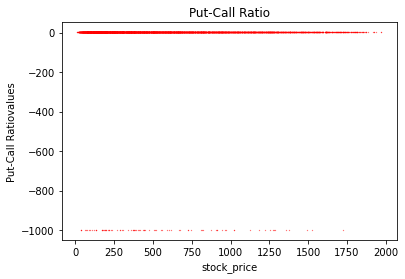

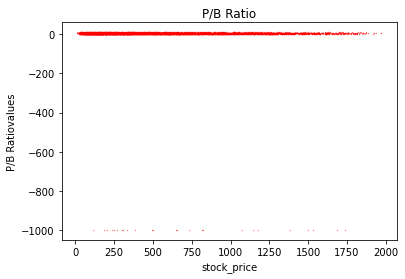

In [3]:
#import matplotlib
#matplotlib.use('Agg')
y=y.values
i=0
for col in train.columns:
  if col in cats:
    #its a categorical column  we need to convert the categories to numbers
    catlabel,legend= pd.factorize(train[col])
    plt.scatter(y,catlabel, s=0.05, c='b', alpha=0.5)
    
    plt.title(col+str(legend))
    plt.xlabel('stock_price')
    plt.ylabel('categories')
    plt.savefig('/content/drive/My Drive/hack/data analysis/'+str(i)+'.jpg',)
    plt.show()
    #plt.savefig(col+'.png',)
  if col in uncats:
    #its a continuous col
    #catlabel,legend= pd.factorize(train[col])
    yesx=train[col].values
    plt.scatter(y,yesx, s=0.05, c='r', alpha=1)
    

    plt.title(col)
    plt.xlabel('stock_price')
    plt.ylabel(col+'values')
    plt.savefig('/content/drive/My Drive/hack/data analysis/'+str(i)+'.jpg',)
    plt.show()
    #plt.savefig(col+'.png',)  
  i+=1  
    

In [4]:
print(np.shape(y))
print(np.shape(train.values))

(7383,)
(7383, 13)


In [5]:
!pip install catboost

In [6]:
train.dtypes


Index                    object
Industry                 object
VWAP                    float64
General Index           float64
NAV                     float64
P/E Ratio               float64
Volumes Traded          float64
Inventory Turnover      float64
Covid Impact (Beta)     float64
Tracking Error          float64
Dollar Exchange Rate    float64
Put-Call Ratio          float64
P/B Ratio               float64
dtype: object

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train, y, train_size=0.6, random_state=1234)

categorical_features_indices = np.where(train.dtypes != np.float)[0]
print(categorical_features_indices)






[0 1]


In [8]:
# importing library and building model

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

model=CatBoostRegressor(iterations=100,depth=16
                       ,learning_rate=0.1, loss_function='RMSE')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)


y_scores = model.predict(X_validation)

from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error

score = mean_squared_error(y_validation, y_scores)
print("mse score on 40 percent data:",score)
score = mean_absolute_error(y_validation, y_scores)
print("mae score on 40 percent data:",score)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 400.5753876	test: 399.4619503	best: 399.4619503 (0)	total: 1.55s	remaining: 2m 33s
1:	learn: 373.7963175	test: 374.7763587	best: 374.7763587 (1)	total: 2.39s	remaining: 1m 57s
2:	learn: 347.8487338	test: 350.0378825	best: 350.0378825 (2)	total: 2.62s	remaining: 1m 24s
3:	learn: 325.4069358	test: 330.3089045	best: 330.3089045 (3)	total: 3.48s	remaining: 1m 23s
4:	learn: 301.6553205	test: 307.9280553	best: 307.9280553 (4)	total: 4.33s	remaining: 1m 22s
5:	learn: 280.0742923	test: 286.6589383	best: 286.6589383 (5)	total: 4.39s	remaining: 1m 8s
6:	learn: 260.4514055	test: 268.3522812	best: 268.3522812 (6)	total: 5.24s	remaining: 1m 9s
7:	learn: 246.3560772	test: 256.6272249	best: 256.6272249 (7)	total: 6.1s	remaining: 1m 10s
8:	learn: 232.0467379	test: 244.3759468	best: 244.3759468 (8)	total: 6.96s	remaining: 1m 10s
9:	learn: 216.5328102	test: 229.8532783	best: 229.8532783 (9)	total: 7.81s	remaining: 1m 10s
10:	learn: 202.5670903	test: 217.1159200	best: 217.1159200 (10)	total: 8.

In [9]:
print(y_validation)

[ 768.61007391  385.66210879  302.0555764  ...  390.97346355 1151.12197888
  862.94729445]


In [10]:
print(y_scores)

[ 769.04134723  376.17382053  334.55929234 ...  376.16832983 1110.87346613
  840.12529648]


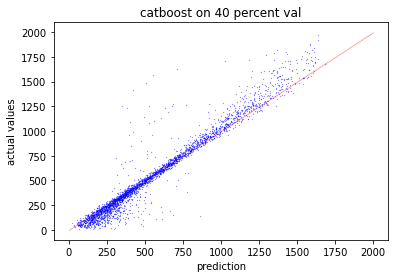

In [11]:
# to check the fit on 40 percent validation we plot yscores vs yvalidation and see how much it follows y=x line

a=[]
for i in range(0,2000):
  a.append(i)
plt.scatter(np.array(a),np.array(a), s=0.05, c='r', alpha=0.1)
plt.scatter(y_scores,y_validation, s=0.05, c='b', alpha=0.8)
plt.title("catboost on 40 percent val")
plt.xlabel('prediction')
plt.ylabel('actual values')
plt.savefig('/content/drive/My Drive/hack/data analysis/'+"catboost_regression_test"+'.jpg',)
plt.show()

Now to train it on 95 percent data and use 5 percent for validation to check for overfitting

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 390.1443025	test: 405.0734793	best: 405.0734793 (0)	total: 903ms	remaining: 1m 29s
1:	learn: 359.0258541	test: 372.1045293	best: 372.1045293 (1)	total: 1.73s	remaining: 1m 24s
2:	learn: 333.0446468	test: 344.5947187	best: 344.5947187 (2)	total: 2.57s	remaining: 1m 23s
3:	learn: 307.7326973	test: 318.5148061	best: 318.5148061 (3)	total: 3.4s	remaining: 1m 21s
4:	learn: 284.4451434	test: 294.5929905	best: 294.5929905 (4)	total: 4.24s	remaining: 1m 20s
5:	learn: 265.5635405	test: 275.2883907	best: 275.2883907 (5)	total: 5.07s	remaining: 1m 19s
6:	learn: 247.9506841	test: 257.8946141	best: 257.8946141 (6)	total: 5.91s	remaining: 1m 18s
7:	learn: 234.4795282	test: 246.2950119	best: 246.2950119 (7)	total: 6.75s	remaining: 1m 17s
8:	learn: 218.6405921	test: 230.6380037	best: 230.6380037 (8)	total: 7.58s	remaining: 1m 16s
9:	learn: 205.4571148	test: 218.4627613	best: 218.4627613 (9)	total: 8.42s	remaining: 1m 15s
10:	learn: 195.4928442	test: 210.3547900	best: 210.3547900 (10)	total: 

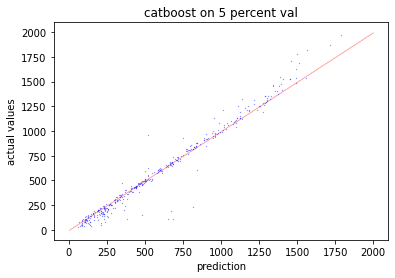

In [12]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, train_size=0.95, random_state=1234)

categorical_features_indices = np.where(train.dtypes != np.float)[0]

model=CatBoostRegressor(iterations=100,depth=16
                       ,learning_rate=0.1, loss_function='RMSE')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)


y_scores = model.predict(X_validation)

from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error

score = mean_squared_error(y_validation, y_scores)
print("mse score on 5 percent data:",score)
score = mean_absolute_error(y_validation, y_scores)
print("mae score on 5 percent data:",score)
# to check the fit on 5 percent validation we plot yscores vs yvalidation and see how much it follows y=x line

a=[]
for i in range(0,2000):
  a.append(i)
plt.scatter(np.array(a),np.array(a), s=0.05, c='r', alpha=0.1)
plt.scatter(y_scores,y_validation, s=0.05, c='b', alpha=0.8)
plt.title("catboost on 5 percent val")
plt.xlabel('prediction')
plt.ylabel('actual values')
plt.savefig('/content/drive/My Drive/hack/data analysis/'+"catboost_regression_test_final"+'.jpg',)
plt.show()
model.save_model('/content/drive/My Drive/hack/models/catboost_regression_test_final')



In [13]:
# testing data and sumbmition file <create new folder> 
print(test.head())
print(test_indx.head())

     Index          Industry  ...  Put-Call Ratio  P/B Ratio
0      NSE         Materials  ...            0.80       4.66
1      JSE            Energy  ...            0.86       6.11
2  S&P 500  Information Tech  ...            0.93       4.99
3      NSE        Healthcare  ...            1.09       1.26
4     NYSE         Materials  ...         -999.00       6.18

[5 rows x 13 columns]
0    AC3235
1    AC3236
2    AC3237
3    AC3238
4    AC3239
Name: Stock Index, dtype: object


In [14]:

y_scores = model.predict(test)

In [15]:
sub = pd.DataFrame()
sub['Stock Index']=test_indx
sub['Stock Price'] = y_scores

In [16]:
sub.to_csv('/content/drive/My Drive/hack/task1_outputs/catboost.csv',index=False)